In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import time 

In [2]:
df = pd.read_csv("../data/match_data_compact.csv")

scaler = RobustScaler().set_output(transform="pandas")
X = df.drop(columns=["blueTeamWin"])
X = scaler.fit_transform(X)
y = df["blueTeamWin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

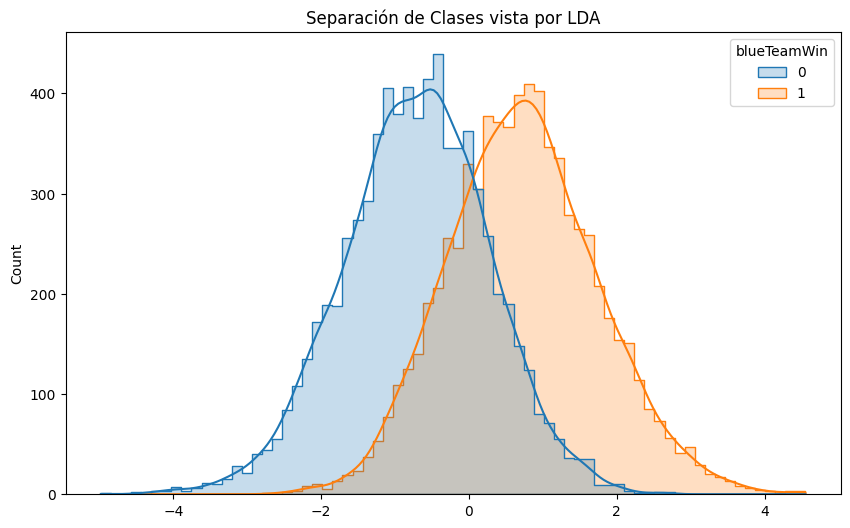

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=1) 
X_lda = lda.fit_transform(X_train, y_train)




plt.figure(figsize=(10, 6))
sns.histplot(x=X_lda.flatten(), hue=y_train, kde=True, element="step")
plt.title("Separación de Clases vista por LDA")
plt.show()

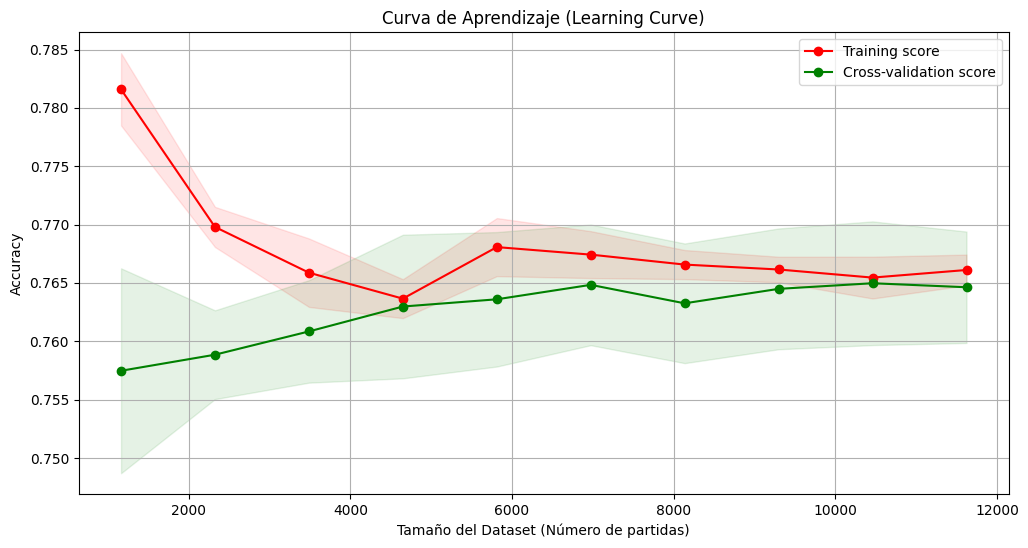

In [6]:
from sklearn.model_selection import learning_curve

model = LinearSVC()
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train, 
    y=y_train,
    cv=5,               
    n_jobs=-1,          
    train_sizes=np.linspace(0.1, 1.0, 10), 
    scoring='accuracy'
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(12, 6))


plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")

plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Curva de Aprendizaje (Learning Curve)")
plt.xlabel("Tamaño del Dataset (Número de partidas)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


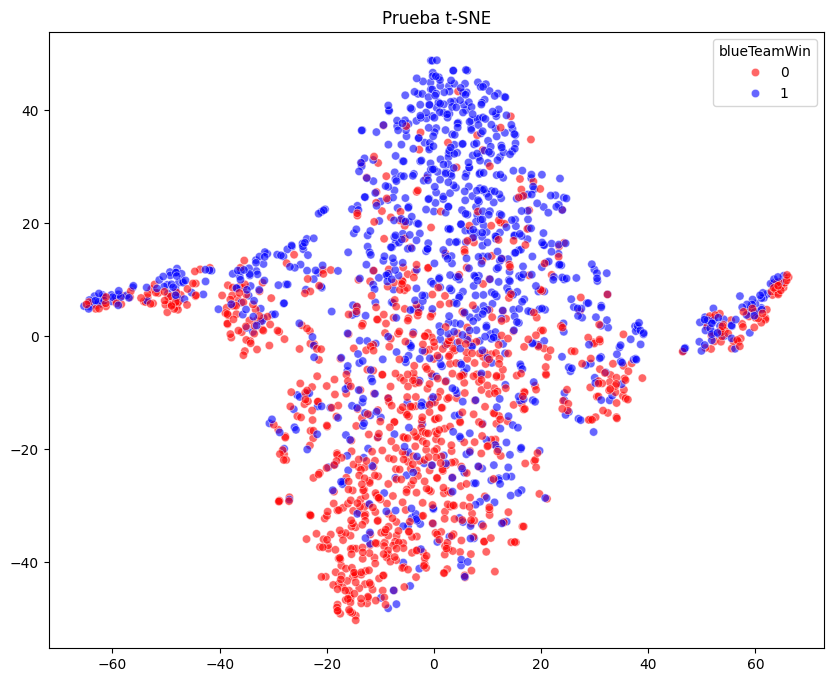

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cogemos una muestra (t-SNE es muy pesado para todo el dataset)
N = 2000 
X_subset = X_train.iloc[:N]
y_subset = y_train.iloc[:N]

# 2. Reducimos la dimensionalidad a 2D
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_embedded = tsne.fit_transform(X_subset)

# 3. Graficamos
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_embedded[:,0], 
    y=X_embedded[:,1], 
    hue=y_subset, 
    palette={0: 'red', 1: 'blue'}, # Ajusta según tus etiquetas (0/1)
    alpha=0.6
)
plt.title("Prueba t-SNE")
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

neighbors = knn.kneighbors(X_test, return_distance=False)
y_test_array = y_test.to_numpy() 


confused_points = 0
for i, neighbor_indices in enumerate(neighbors):
    true_label = y_test_array[i]
    neighbor_labels = y_train.iloc[neighbor_indices].values
    prediction = 1 if np.mean(neighbor_labels) > 0.5 else 0
    if prediction != true_label:
        confused_points += 1

print(f"Porcentaje de partidas que son geométricamente indistinguibles de su contrario: {confused_points / len(X_test) * 100:.2f}%")

Porcentaje de partidas que son geométricamente indistinguibles de su contrario: 29.18%
